In [ ]:
#Copyright 2020 Soham Pachpande, Gehan Chopade, Arun Kumar
#
#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from dedup_lib.utils import makeCFwithStats

### Read Data and process Data

In [2]:
data_path = "featurizedData/distFeatureData.csv"
df=pd.read_csv(data_path)

In [3]:
df.head()

,w1,w2,count1,count2,total1,total2,isDuplicate,jaccard_1,jaccard_2,jaccard_3,cosine_1,cosine_2,cosine_3,w_levenshtein
0,libya,lesotho,89.0,368.0,48269.0,48269.0,0.0,0.900000,1.000000,1.000000,0.850929,1.000000,1.000000,6.0
1,00850-9846,09830-2602,1.0,1.0,1973.0,1973.0,0.0,0.444444,0.875000,1.000000,0.222222,0.777778,1.000000,6.0
2,a1050000006tnqi,a1050000000wves,265.0,151.0,4861.0,4861.0,0.0,0.692308,0.642857,0.642857,0.072561,0.120951,0.164427,5.0
3,plus_statistical_discrepancy,imports_of_services,5504.0,7982.0,191325.0,191325.0,0.0,0.555556,0.923077,1.000000,0.313096,0.876909,1.000000,23.0
4,ca-mb ca-sb sb,ca-mb ca-sb ca-sbe cdvbe mbe mosb sb sbasdb sd...,3781.0,1.0,346018.0,346018.0,0.0,0.363636,0.590909,0.666667,0.088993,0.190076,0.279512,36.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isDuplicate','w1','w2', 'count1', 'count2', 'total1', 'total2'],axis=1), 
                                                    df['isDuplicate'], test_size=0.3)

# ML Models

### Logistic Regression on all Features

In [5]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

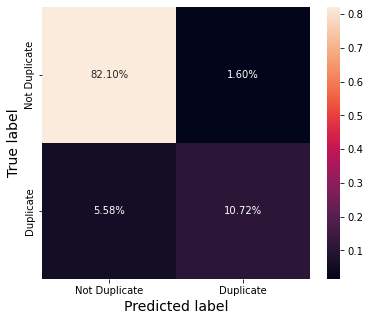

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2833
         1.0       0.87      0.66      0.75       552

    accuracy                           0.93      3385
   macro avg       0.90      0.82      0.85      3385
weighted avg       0.93      0.93      0.92      3385



In [8]:
makeCFwithStats(predictions, y_test)
print(classification_report(y_test, predictions))

### Feature Engineering

In [9]:
from numpy import set_printoptions
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

X_train['w_levenshtein']=X_train['w_levenshtein']/X_train['w_levenshtein'].max()
X_train.head()
test = SelectKBest(score_func=f_classif, k=3)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.feature_names_in_ ,fit.scores_)

['jaccard_1' 'jaccard_2' 'jaccard_3' 'cosine_1' 'cosine_2' 'cosine_3'
 'w_levenshtein'] [3979.602 8249.746 7990.367 2612.699 6727.747 6936.518  418.923]


### The top features are cosine_2,cosine_3,jaccard_2,jaccard_3

## Models on top features

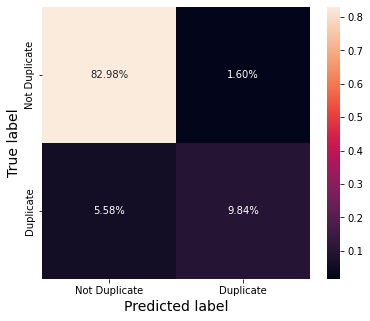

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2863
         1.0       0.86      0.64      0.73       522

    accuracy                           0.93      3385
   macro avg       0.90      0.81      0.85      3385
weighted avg       0.93      0.93      0.92      3385



In [10]:
# Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(df[['cosine_2','cosine_3','jaccard_2','jaccard_3']],df['isDuplicate'], test_size=0.3)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
makeCFwithStats(predictions, y_test)
print(classification_report(y_test, predictions))

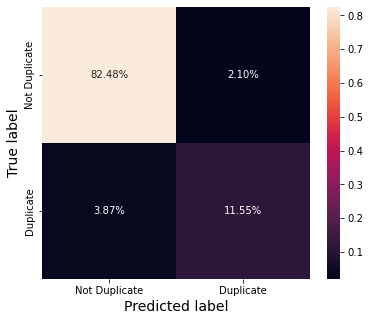

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2863
         1.0       0.85      0.75      0.79       522

    accuracy                           0.94      3385
   macro avg       0.90      0.86      0.88      3385
weighted avg       0.94      0.94      0.94      3385



In [11]:
# SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
makeCFwithStats(predictions, y_test)
print(classification_report(y_test, predictions))

### Decision Tree

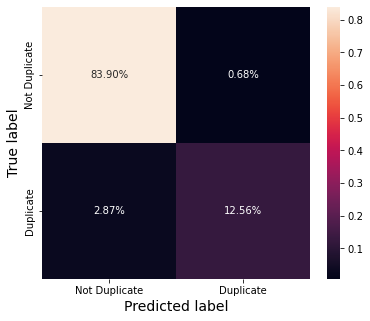

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2863
         1.0       0.95      0.81      0.88       522

    accuracy                           0.96      3385
   macro avg       0.96      0.90      0.93      3385
weighted avg       0.96      0.96      0.96      3385



In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
makeCFwithStats(predictions, y_test)
print(classification_report(y_test, predictions))

### Random Forest

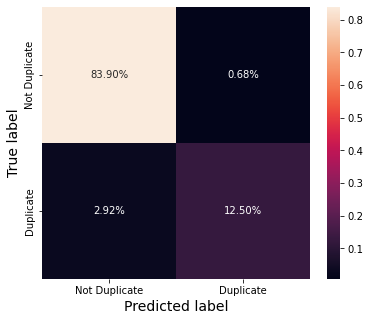

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2863
         1.0       0.95      0.81      0.87       522

    accuracy                           0.96      3385
   macro avg       0.96      0.90      0.93      3385
weighted avg       0.96      0.96      0.96      3385



In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train, y_train)
predictions=model.predict(X_test)
makeCFwithStats(predictions, y_test)
print(classification_report(y_test, predictions))